In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

In [2]:
melbourne = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

<AxesSubplot:>

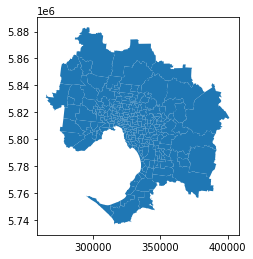

In [3]:
melbourne.plot()

In [4]:
melbourne.crs

<Projected CRS: EPSG:28355>
Name: GDA94 / MGA zone 55
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - 144°E to 150°E
- bounds: (144.0, -50.89, 150.01, -9.23)
Coordinate Operation:
- name: Map Grid of Australia zone 55
- method: Transverse Mercator
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
geometry = melbourne['geometry'].iloc[0]
print(type(geometry))

<class 'shapely.geometry.polygon.Polygon'>


In [6]:
geometry_cut = ox.utils_geo._quadrat_cut_geometry(geometry,quadrat_width=151)

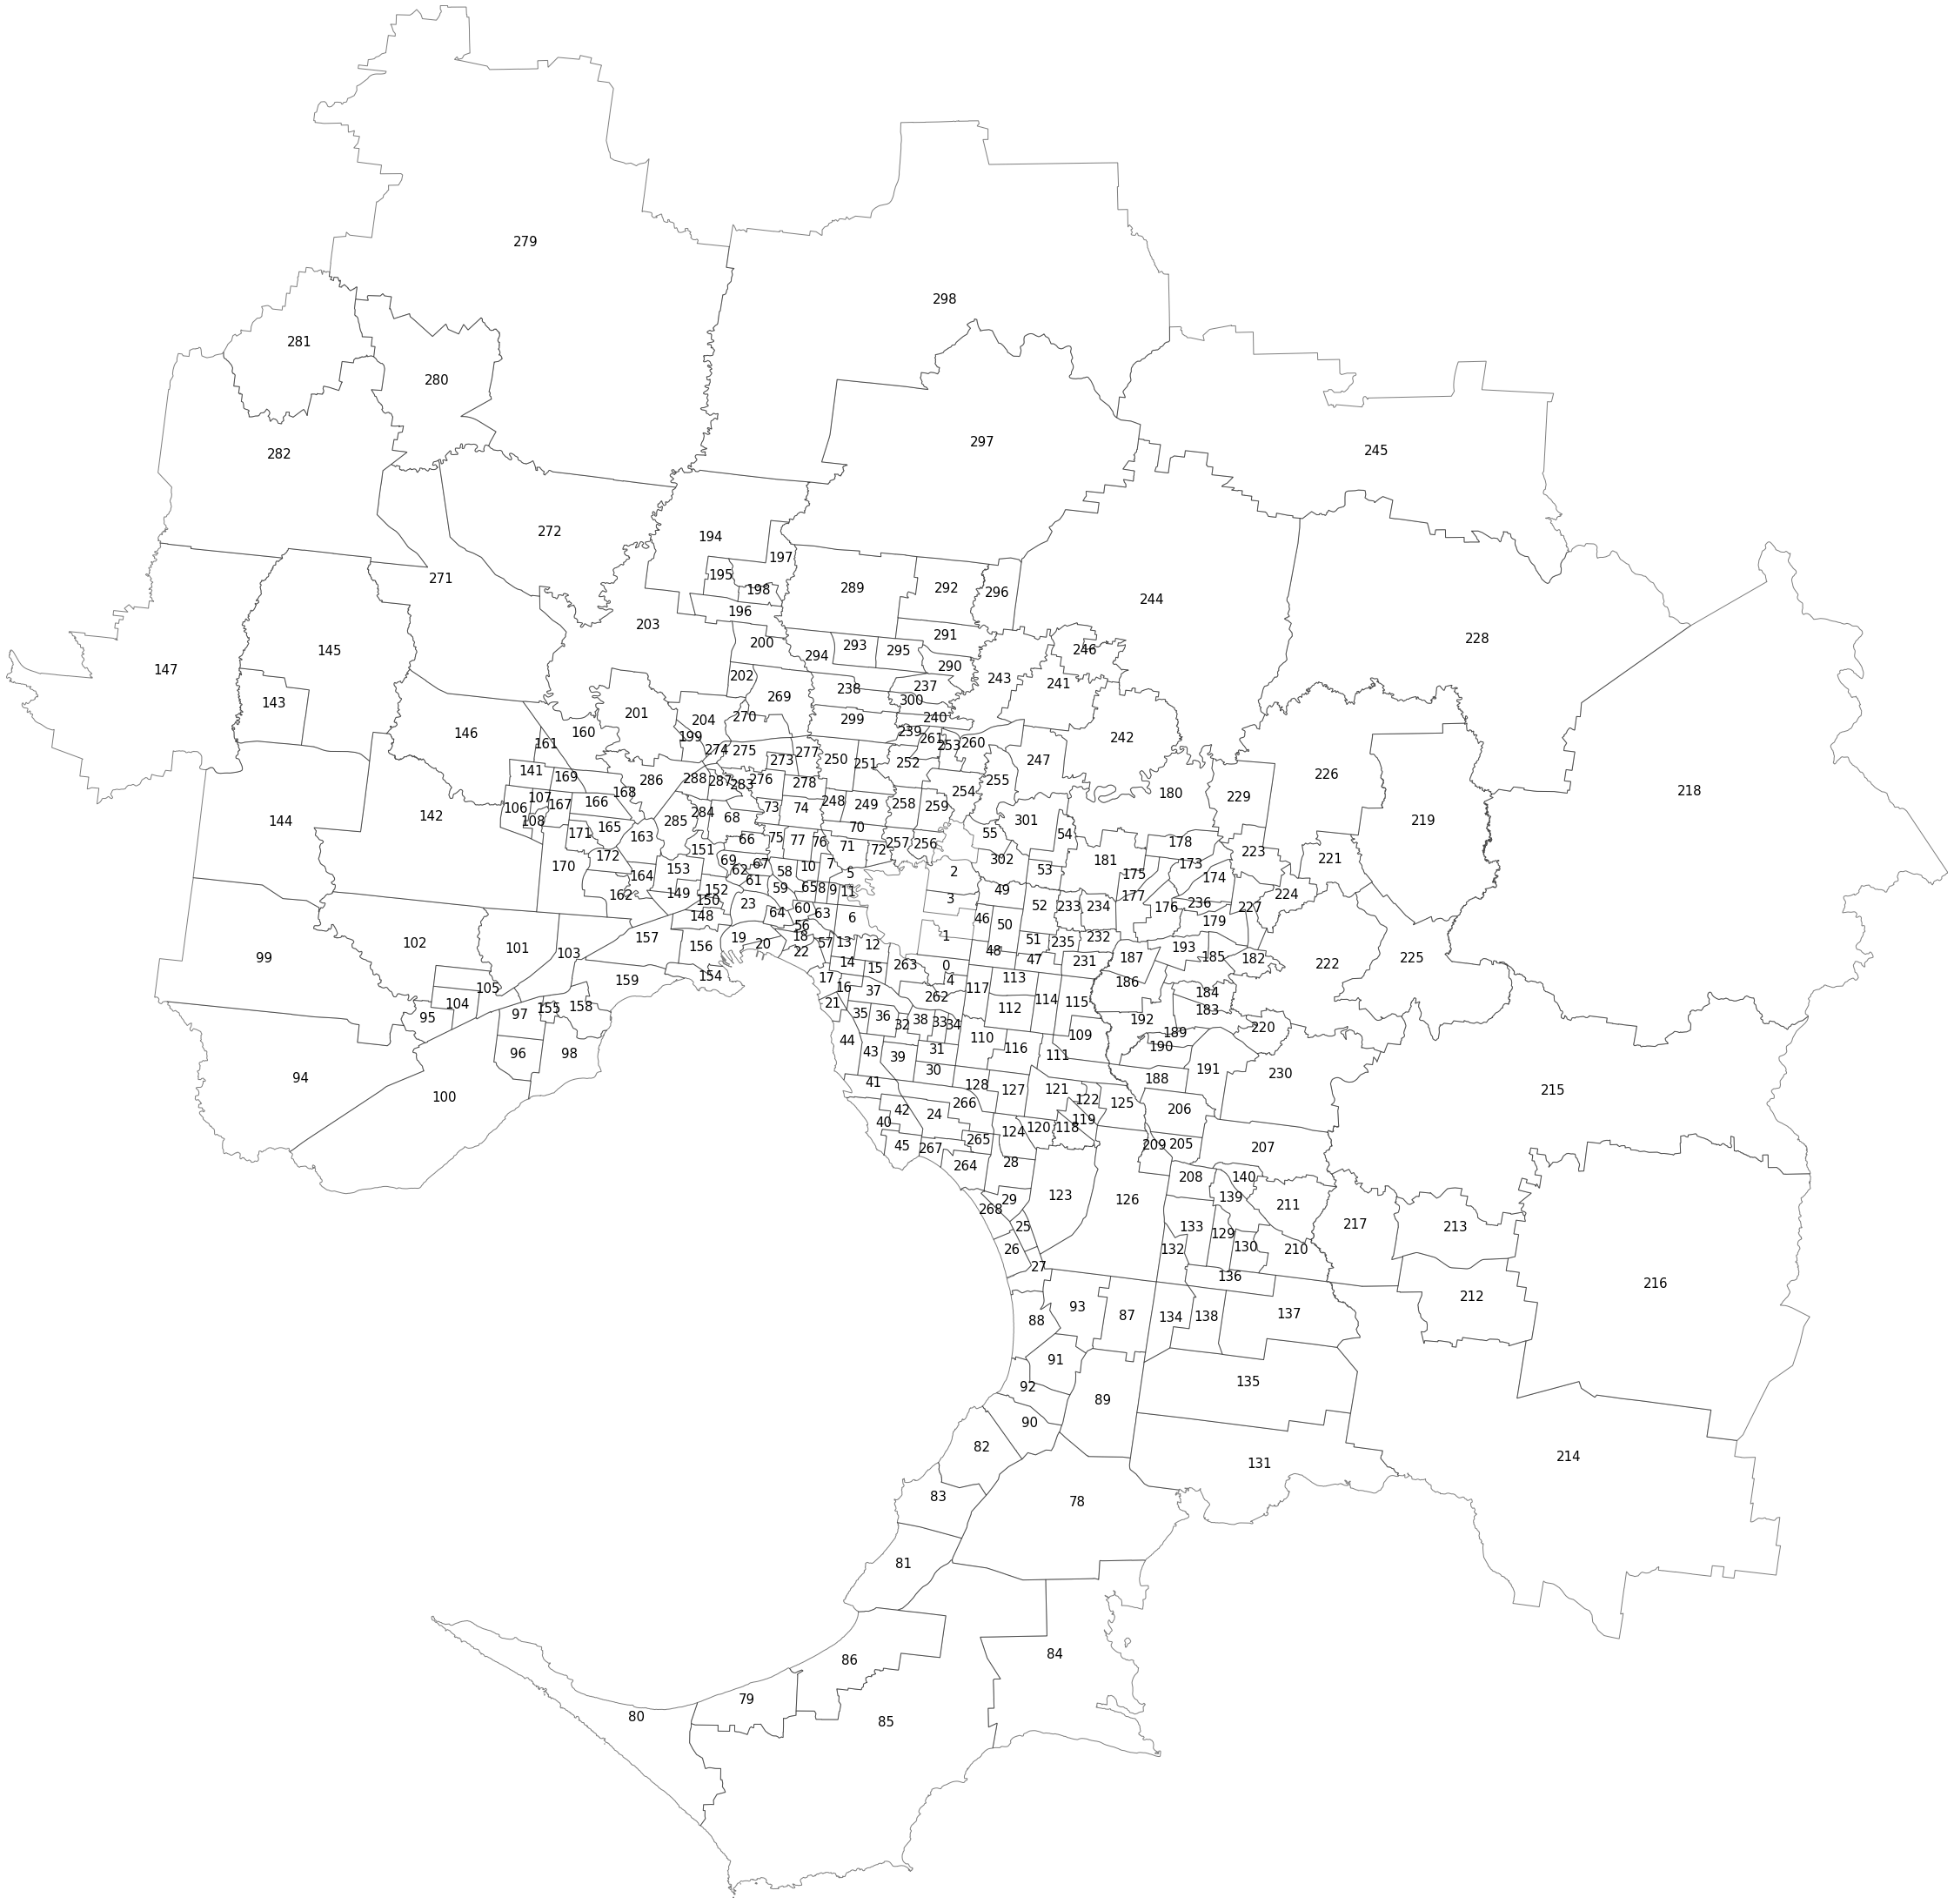

In [7]:
polylist = [p for p in geometry_cut]

west, south, east, north = melbourne.unary_union.bounds

fig, ax  = plt.subplots(figsize=(40,40))

for polygon, n in zip(melbourne['geometry'],np.arange(len(polylist))):
    p = polygon.representative_point().coords[:][0]
    patch = PolygonPatch(polygon,fc='#ffffff', ec='#000000', alpha=0.5, zorder=2)
    ax.add_patch(patch)
    plt.annotate(text=n, xy=p,horizontalalignment='center',size=15)
ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig("Melbounre_309zones.jpg")
plt.show()

In [45]:
polyframe = gpd.GeoDataFrame(geometry=polylist)
polyframe.crs = melbourne.crs
print(polyframe.crs)

epsg:28355


In [46]:
polyframe.head()

,geometry
0,"POLYGON ((329054.627 5808677.146, 329052.844 5..."
1,"POLYGON ((329017.079 5808706.382, 328998.469 5..."
2,"POLYGON ((328998.469 5808856.179, 328998.469 5..."
3,"POLYGON ((328998.469 5809005.975, 328998.469 5..."
4,"POLYGON ((328998.469 5809155.772, 328998.469 5..."


In [47]:
len(polyframe)

303

In [48]:
import contextily as ctx

polyframe_3857 = polyframe.to_crs(epsg=3857)

(5736261.646583678, 5883216.40688877)

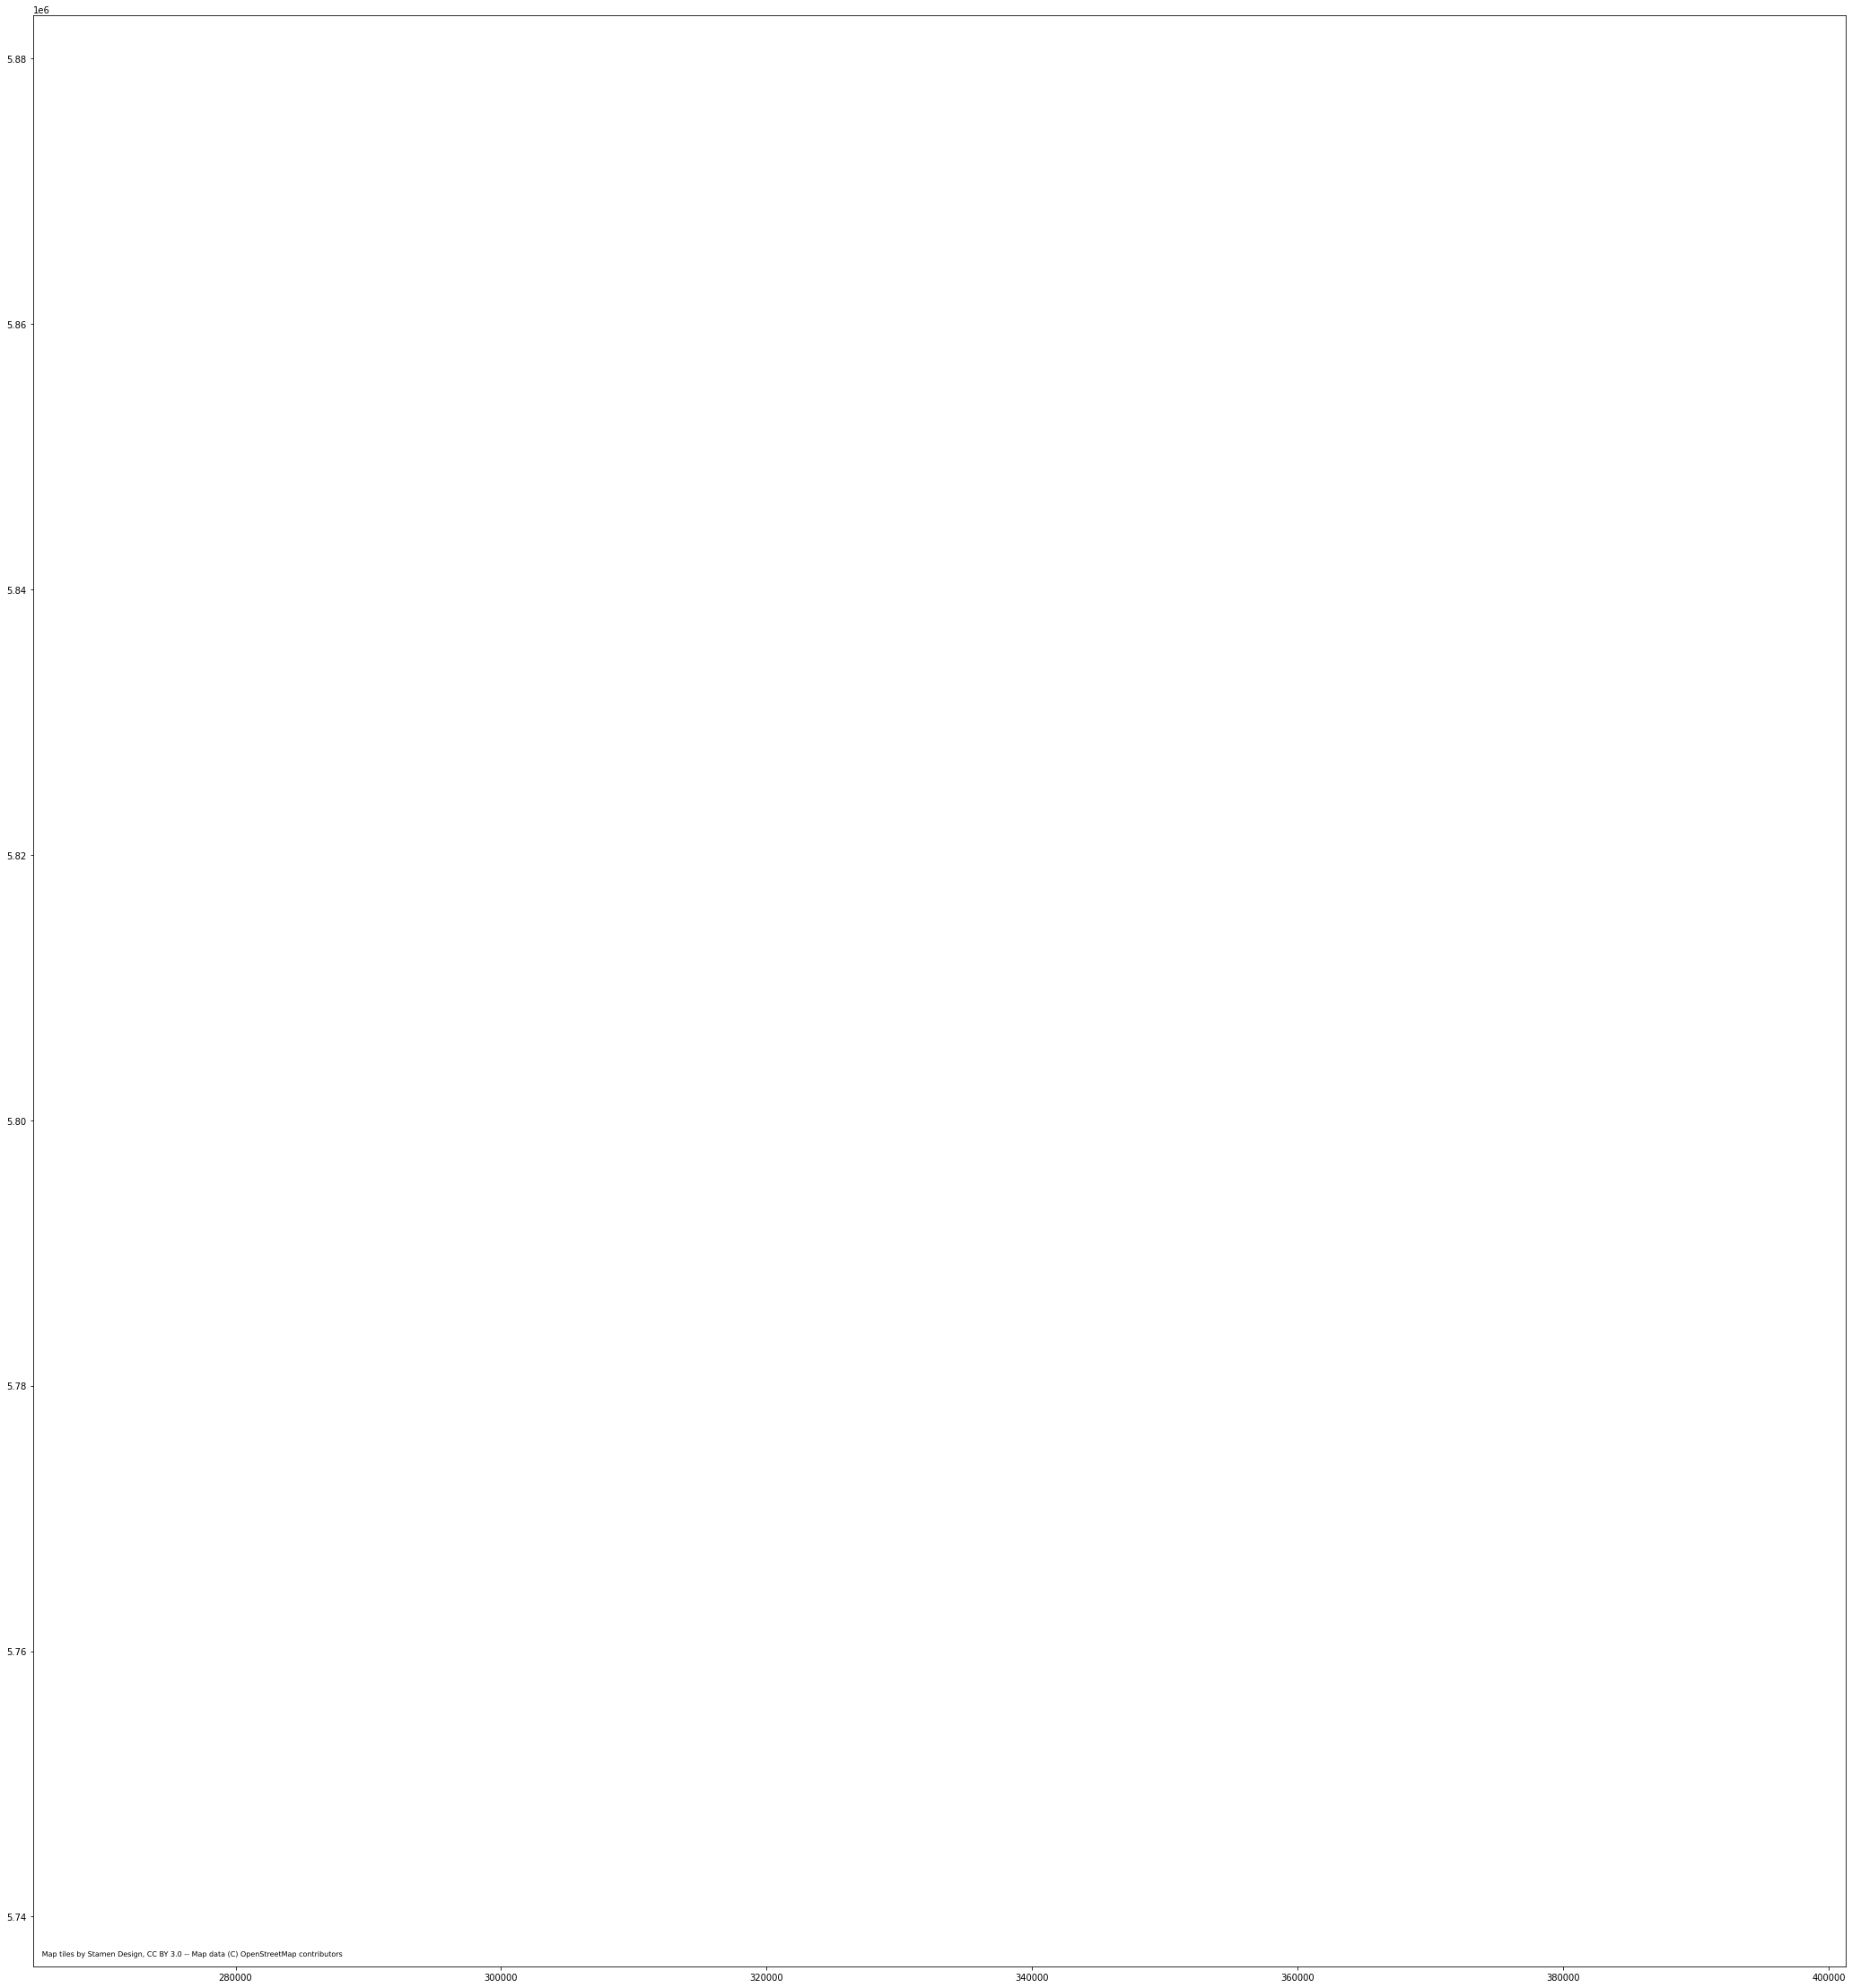

In [49]:
west, south, east, north = melbourne.unary_union.bounds
ax = polyframe_3857.plot(figsize=(40,40), alpha=0.5,edgecolor='k')
ctx.add_basemap(ax,zoom=13)
ax.set_xlim(west,east)
ax.set_ylim(south,north)

In [50]:
melbourne = pd.read_csv('/Users/cptnemo2005/Desktop/SEIR/melbourne_population.csv', sep=',',header=None)
pop       = melbourne.values
pop       = np.nan_to_num(pop, copy = True)
pop       = pop.astype(int)

In [51]:
pop

array([[2418, 3090, 3818, ..., 7129, 4976, 3202],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

In [76]:
melbourne_pop = pop[0,:]*4

In [77]:
melbourne_pop

array([ 9672, 12360, 15272, 25824,  9636,  3048, 16512, 10872, 15904,
       14904,  7276,  8948, 16504, 12372, 24440, 27456, 12584, 10740,
       21724, 21632,  7992, 14012, 13856, 17060,  9436, 16588, 13520,
        9516, 19192,  1188, 18432, 11108, 10820, 19212, 10572, 10004,
        7848, 19324, 21924, 24100,  3336, 16172, 11580, 17660, 12216,
       10704,  3468, 18320, 20592, 27292, 31536, 20420, 15732, 11976,
       25952, 13612, 23924, 14012, 13864, 12980, 11836, 13976, 15636,
         192,  8224, 22640, 18664, 20844, 11128, 16852, 17696,  5828,
       12284, 13652, 15500, 15264,  6892, 25700, 21732, 25200,  5524,
       14376,  5268, 23356, 14088, 16292, 15628,   140, 13900, 19020,
       23396,  8260, 19716,  5716, 35456, 13280, 15176, 12092,  9204,
       17220,  8812, 13108, 13480,  5224,  9284, 11732,  9708, 15096,
       17972, 21740,   196, 22144,  4644, 18360, 11612, 16912, 18816,
        7584, 12192, 13460, 18936, 15384, 19080, 11524, 29376,  7800,
       14112,  5528,

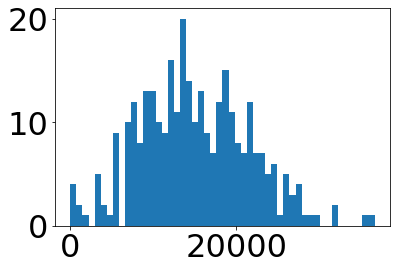

In [78]:
plt.hist(melbourne_pop,bins=50)
plt.show()

In [79]:
melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

In [80]:
len(melbourne_gpd)

309

In [81]:
len(melbourne_pop)

309

In [82]:
melbourne_gpd['population'] = melbourne_pop

In [83]:
melbourne_gpd

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,population
0,207011150,21150,Glen Iris - East,20701,Boroondara,207,Melbourne - Inner East,2GMEL,Greater Melbourne,2,Victoria,5.7049,"POLYGON ((329054.627 5808677.146, 329052.844 5...",9672
1,207011149,21149,Camberwell,20701,Boroondara,207,Melbourne - Inner East,2GMEL,Greater Melbourne,2,Victoria,7.2919,"POLYGON ((329055.033 5811653.372, 329064.628 5...",12360
2,207011148,21148,Balwyn North,20701,Boroondara,207,Melbourne - Inner East,2GMEL,Greater Melbourne,2,Victoria,8.8491,"POLYGON ((329567.629 5815565.597, 329594.666 5...",15272
3,207011147,21147,Balwyn,20701,Boroondara,207,Melbourne - Inner East,2GMEL,Greater Melbourne,2,Victoria,5.5850,"POLYGON ((329306.894 5813597.011, 329317.967 5...",25824
4,207011146,21146,Ashburton (Vic.),20701,Boroondara,207,Melbourne - Inner East,2GMEL,Greater Melbourne,2,Victoria,2.8366,"POLYGON ((330701.372 5807239.305, 330651.000 5...",9636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,207011155,21155,Surrey Hills (West) - Canterbury,20701,Boroondara,207,Melbourne - Inner East,2GMEL,Greater Melbourne,2,Victoria,5.7026,"POLYGON ((329899.731 5812170.519, 329854.997 5...",13856
305,207011154,21154,Kew East,20701,Boroondara,207,Melbourne - Inner East,2GMEL,Greater Melbourne,2,Victoria,4.0155,"POLYGON ((327374.578 5815430.746, 327393.832 5...",9508
306,207011153,21153,Kew,20701,Boroondara,207,Melbourne - Inner East,2GMEL,Greater Melbourne,2,Victoria,10.5340,"POLYGON ((324537.801 5814403.178, 324550.629 5...",28516
307,207011152,21152,Hawthorn East,20701,Boroondara,207,Melbourne - Inner East,2GMEL,Greater Melbourne,2,Victoria,3.8240,"POLYGON ((327885.723 5811669.490, 327899.018 5...",19904


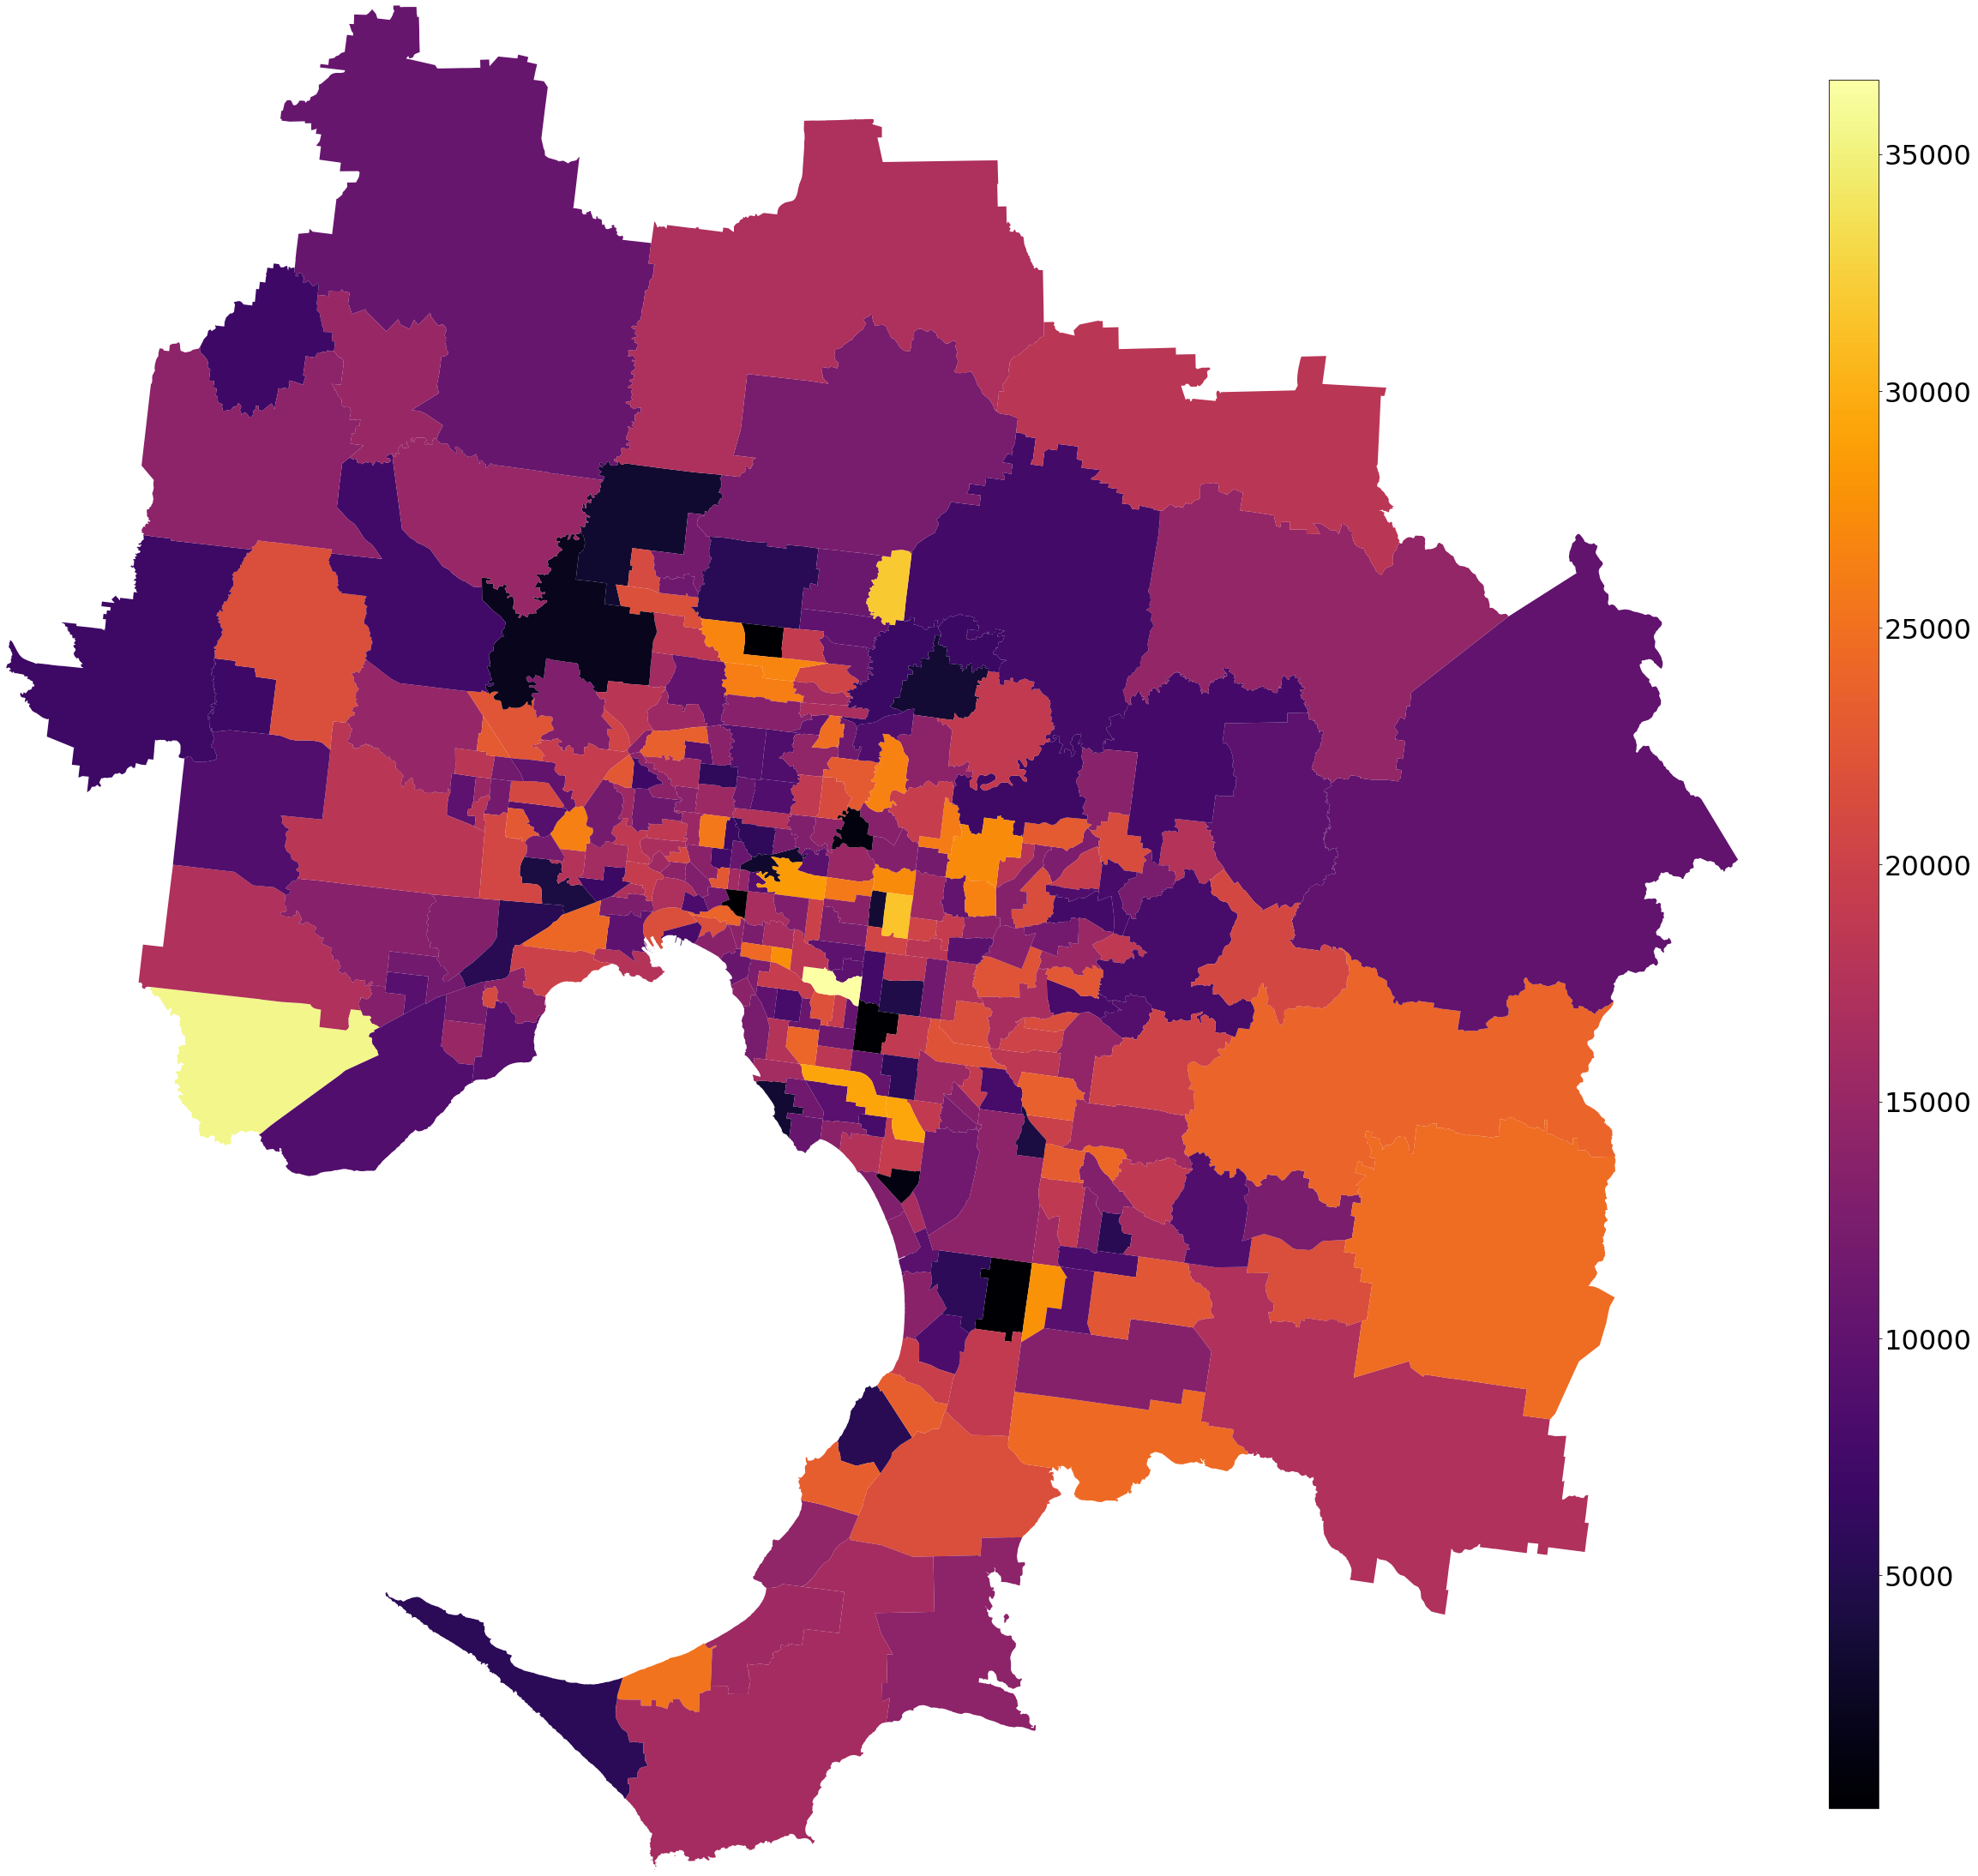

In [88]:
plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='inferno')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='inferno',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig("melbourne_pop_dis.jpg")
plt.show()